# Building a perceptron

--------------------------------------prerequisite(begin)-------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
%pylab inline
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


--------------------------------------prerequisite(end)---------------------------------------------

in last topic , we saw a use of perceptron. that was a fairly simple use case, since we were able to create a model which would predict correct output for upto 2 1-bit inputs by changing just a few values in an equation.  
However , the real life situation is much different than this, the data is rather a large set of multiple bit values.  
So if we have a sample points using which we have to make a points classifier :  
1.  We would plot the points on a 2d plan as it is. they will be color coded, based on their actual values, like red and blue
2. Since the Algorithm doesn't have a model yet, it starts from a random side and draws a line dividing the plain into2 halves, one expected to have all the red points , and other expected to have all the blue points.
3. But since this line is being randomly drawn, it is a fair chance, that it  does not do what is expected, i.e it has  some blue points in the red half or vice vera

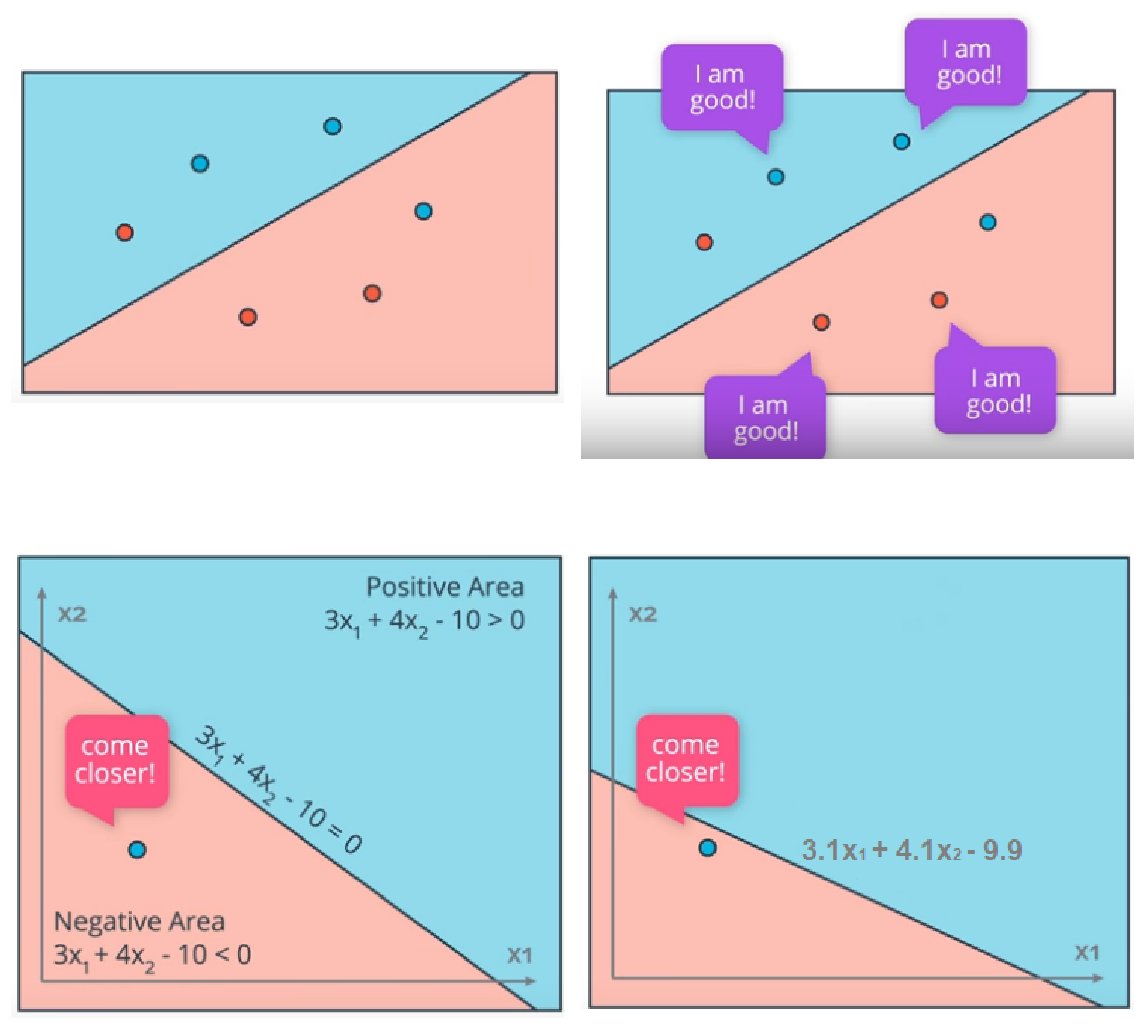

In [2]:
filename1 = r'P:\PYTHON\PYTORCH_SCHOLARSHIP\ab_perceptrons\points classifier_inaccurate.png'
filename2 = r"P:\PYTHON\PYTORCH_SCHOLARSHIP\ab_perceptrons\points classifier_inaccurate_2.png"
filename3 = r'P:\PYTHON\PYTORCH_SCHOLARSHIP\ab_perceptrons\points classifier_inaccurate_3.png'
filename4 = r"P:\PYTHON\PYTORCH_SCHOLARSHIP\ab_perceptrons\points classifier_accurate_4.png"

fig = plt.figure(figsize=[16, 16])

sub1 = fig.add_subplot(2, 2, 1, frameon=False)
img = mpimg.imread(filename1)

sub2 = fig.add_subplot(2, 2, 2, frameon=False)
img2 = mpimg.imread(filename2)

sub3 = fig.add_subplot(2, 2, 3, frameon=False)
img3 = mpimg.imread(filename3)

sub4 = fig.add_subplot(2, 2, 4, frameon=False)
img4 = mpimg.imread(filename4)

sub1.imshow(img)
sub2.imshow(img2)
sub3.imshow(img3)
sub4.imshow(img4)


plt.setp(sub1, xticks=[], yticks=[])
plt.setp(sub2, xticks=[], yticks=[])
plt.setp(sub3, xticks=[], yticks=[])
plt.setp(sub4, xticks=[], yticks=[])

plt.tight_layout()
plt.show()

So how do we solve it?
4. Suppose the randomly drawn line is 3x1 +4x2-10. and the wrong point is 1,1.  
5. we subtract the point from the coefficients of this line, i.e the weights . but doing such a large subtraction might disrupt the configaration of othr points, since they are sitting in the right zone.
6. so we subtract a fraction of this point's value, like 10% or 20%  . this fractional multiplier is called **LEARNING RATE**.

```
Line eqn	 	:   3X1  +  4X2  -10
point	    	:   1       1     1
point10%	         :   0.1     0.1   0.1
-----------------------------------------------
(lineqn+point)10%	: 3.1X1  +  4.1X2 -9.9
```
and this equation is actually nearer to wrong point, thus making it right, as shown it in the picture above.   
we keep on subtracting the learning rate until all the wrong points come in the correct area.

## Excersize ===============================================================  
following(data_zzb_points.csv) is the data for different points plotted on the the graph. the orange colored points belong to zone 1 and the blue colored points belong to zone 0. you have to draw a line and therefore divide the plane into two zones zone0 and zone1 such that all the points belonging to zone 1 lie in zone 1 and likewise.


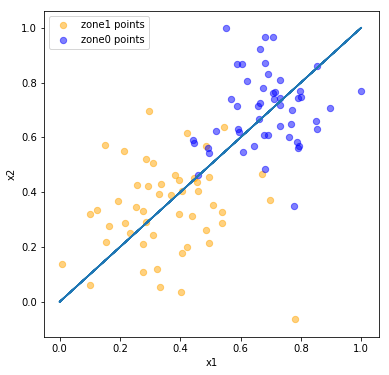

In [39]:
# step 1 plotting the points
dframe = pd.read_csv(r'P:\PYTHON\PYTORCH_SCHOLARSHIP\ab_perceptrons\data_zzb_points.csv')
df_zone1 = dframe[dframe.zone == 1]
df_zone0 = dframe[dframe.zone == 0]
dframe.head()

fig, ax = plt.subplots(figsize=[6, 6])
plt.scatter(df_zone1.x1, df_zone1.x2, s=40, label='zone1 points', color='orange', alpha=0.5)
plt.scatter(df_zone0.x1, df_zone0.x2, s=40, label='zone0 points', color='blue', alpha=0.5)
plt.xlabel("x1"),plt.ylabel('x2')
plt.legend()

# step 2 taking a random line

plt.plot(5*[0,1],5*[0,1])

ValueError: Scalar operands are not allowed, use '*' instead

TypeError: 'int' object is not callable